In [1]:
%tensorflow_version 1.x
import sys
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/nn/conv')

from lenet import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
print("[INFO] accessing MNIST")
dataset = datasets.fetch_openml('mnist_784', version=1)
data = dataset.data

if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0], 1, 28, 28)
else:
    data = data.reshape(data.shape[0], 28, 28, 1)

[INFO] accessing MNIST


In [3]:
(trainX, testX, trainY, testY) = train_test_split(data/255.0, dataset.target.astype("int"), test_size=0.25, random_state=42)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...








In [4]:
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=20, verbose=1)

[INFO] training network...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 52500 samples, validate on 17500 samples
Epoch 1/20





52500/52500 [==============================] - 16s 310us/step - loss: 1.1024 - acc: 0.7306 - val_loss: 0.3713 - val_acc: 0.8866
Epoch 2/20
52500/52500 [==============================] - 3s 63us/step - loss: 0.2717 - acc: 0.9200 - val_loss: 0.2530 - val_acc: 0.9233
Epoch 3/20
52500/52500 [==============================] - 3s 62us/step - loss: 0.1925 - acc: 0.9426 - val_loss: 0.1950 - val_acc: 0.9410
Epoch 4/20
52500/52500 [==============================] - 3s 61us/step - loss: 0.1496 - acc: 0.9557 - val_loss: 0.1380 - val_acc: 0.9601
Epoch 5/20
52500/52500 [==============================] - 3s 61us/step - loss: 0.1238 - acc: 0.9628 - val_loss: 0.1279 - val_acc: 0.9622
Epoch 6/20
52500/52500 [==============================] - 3s 59us/step - loss: 0.1058 - acc: 0.9682 - val_loss: 0.3870 - val_acc: 0.87

In [5]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1714
           1       1.00      0.93      0.96      1977
           2       0.98      0.97      0.97      1761
           3       0.99      0.96      0.97      1806
           4       0.99      0.97      0.98      1587
           5       0.99      0.98      0.98      1607
           6       0.99      0.99      0.99      1761
           7       0.87      1.00      0.93      1878
           8       0.95      0.98      0.96      1657
           9       0.97      0.95      0.96      1752

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



/content/drive/My Drive/Colab_Work


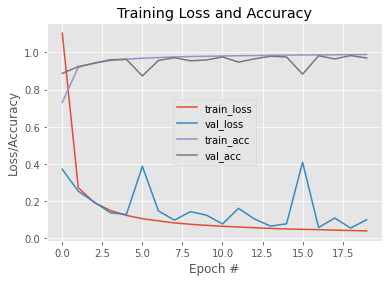

In [9]:
%matplotlib inline
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
%cd /content/drive/My\ Drive/Colab_Work
plt.savefig('lenet_mnist_train_test_plot.png')
#plt.show()